In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # Opencv-python
import os
import pandas as pd
from scipy.stats import mode

In [2]:
train = pd.read_csv("./Pokemon Dataset/Train/train.csv")

In [3]:
images = os.listdir("Pokemon Dataset/Train/Images/")

In [4]:
len(images)

304

In [5]:
dic = {
    0 : "Pikachu",
    1 : "Bulbasaur",
    2 : "Charmander"
}

rev_dic ={ 
    "Pikachu" : 0,
    "Bulbasaur" : 1,
    "Charmander" : 2
}

In [6]:
X = []
y = []

In [7]:
BASE_PATH ="Pokemon Dataset/Train/Images/"

In [8]:
for im in images:
    img_path = BASE_PATH + im
    i = cv2.imread(img_path)
    i = cv2.resize(i, (100,100))
    
    X.append(i)
    
    l = list(train[ train['ImageId'] == im ]['NameOfPokemon'])[0]
    l = rev_dic[l]
    
    y.append(l)

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
X.shape

(304, 100, 100, 3)

In [11]:
y.shape

(304,)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# KNN 

In [13]:
def distance(pA, pB):
    return np.sum((pB-pA)**2)**0.5

def kNN(X, y, query_point , k = 5):
    m = X.shape[0]
    all_distances = []
    
    for i in range(m):
        d = distance(query_point, X[i])
        all_distances.append((d, y[i]))
    
    all_distances.sort()
    all_distances = all_distances[:k]
    
    all_distances = np.array(all_distances)
    labels = all_distances[ :, 1]
    pred = mode(labels)[0][0]
    return int(pred)

In [14]:
test_images = os.listdir("Pokemon Dataset/Test/Images/")

In [15]:
len(test_images)

123

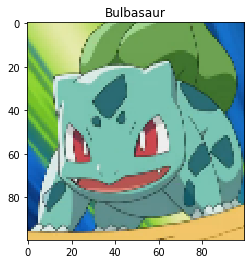

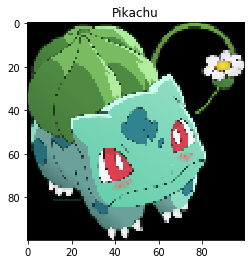

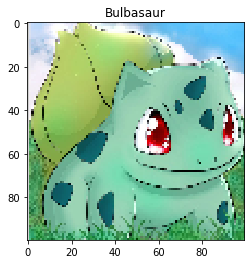

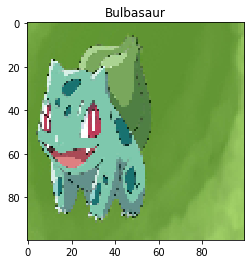

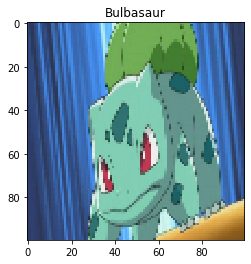

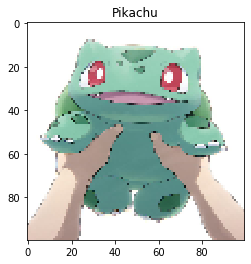

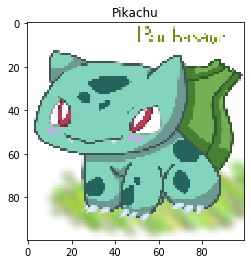

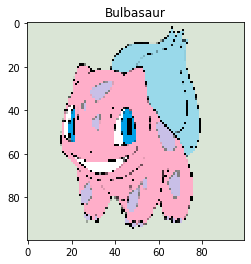

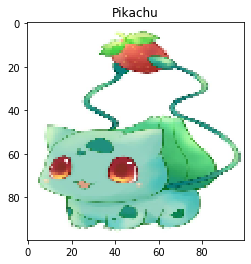

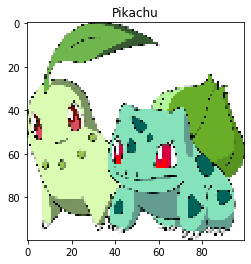

In [16]:
for t_i in test_images[0:10]:
    test_img = cv2.imread("Pokemon Dataset/Test/Images/"+ t_i)
    test_img = cv2.resize(test_img,(100,100))
    

    
    p = kNN(X, y, test_img, k=99)

    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)    
    
    plt.imshow(test_img)
    plt.title(dic[p])
    plt.show()